### Customer income vs spending score using k means Clustering (Machine Learning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
#Taking Annual income and spending score columns from data set
X = df.iloc[: , [3,4]].values

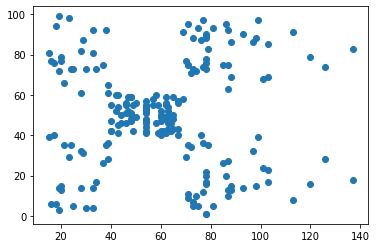

In [11]:
# scatter plot of the dataset X before the Clustering
plt.scatter(X[: , 0] , X[: , 1])

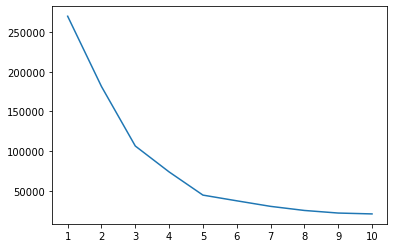

In [12]:
# elbow method to choose number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init ='k-means++' , max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss )
plt.rcParams["figure.figsize"] = (9,7)
plt.xticks(range(1,11))
plt.show()

### so it is clear from our elbow type of line that we will choose 5 clusters

In [20]:
# fitting the 5 clusters to k means and init is for random centroids
kmeans = KMeans(n_clusters=5 , init ='k-means++' , max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
# y_kmeans[0:10]
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [18]:
from collections import Counter
un =np.unique(y_kmeans)
print('clusters 0-4', un)
co= Counter(y_kmeans).values()
print(co)

clusters 0-4 [0 1 2 3 4]
dict_values([23, 22, 81, 39, 35])


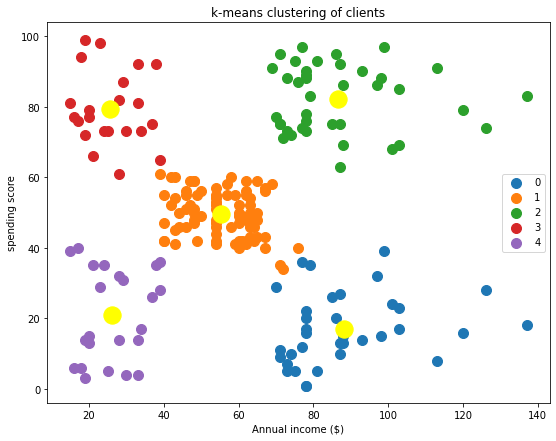

In [21]:
#visualizing the k-means clustering 
for i in range(len(un)):
    plt.scatter(X[y_kmeans ==i , 0] , X[y_kmeans ==i , 1] , s=100 , label =i)

plt.scatter(kmeans.cluster_centers_[: ,0] , kmeans.cluster_centers_[: ,1], s=300 , color ='yellow')
plt.legend()
plt.title('k-means clustering of clients')
plt.xlabel('Annual income ($)')
plt.ylabel('spending score')
plt.show()

### customer segmentation or clustering  based on results 
#### 0 . (blue)  Careful ( high income low spending )
#### 1 . (orange)  standard ( Average income Average spending )
#### 2 . (green)  potential ( High income High spending )
#### 3 . (red)  careless ( low income high spending )
#### 4 . (violet)  sensible ( Average income Average spending )     
#### We can Target our Potiential Customer for marketing in our First priority. we can also target our Standard Customers for some Marketing Campaigns